<a href="https://colab.research.google.com/github/git-hys/Python25Study/blob/main/03_04_%ED%8A%B9%EC%84%B1%EA%B3%B5%ED%95%99%EA%B3%BC_%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# 특성공학이란
# 여러 특성을 사용한 다중회귀에 대해서 알아보자
# 다항 회귀로는 도비의 무게를 어느정도인지 짐작할 수 있었다
# 과소 적합을 해결하려면 제곱보다 고차항을 넣어야함 -> 길이+무게+높이+두께 등등..

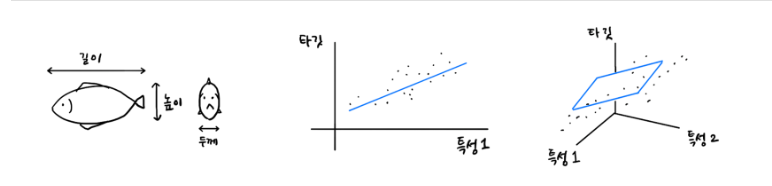

In [8]:
# 다중회귀란 여러개의 특성을 사용한 선형회귀

# 도비의 길이 뿐 아니라 도비의 높이와 두께도 특성에 포함 3개의 특성
# 3개 특성을 제곱하여 추가한다
# 각 특성을 서로 곱해서 또 다른 특성을 만들 수 있따
# 이런 특성을 사용해서 새로운 특성을 뽑아내는 것을 특성공학이라고함

# 데이터 준비 -> 판다스에서 제공하는 데이터 프레임 사용
# 판다스 : 데이터 분석용 라이브러리
# csv 파일은 엑셀을 텍스트로 뽑아낸 메모장 파일

import pandas as pd
# 다중 회귀 : 도비의 길이 무게 너비를 이용한 회귀(3차원)

df = pd.read_csv('https://bit.ly/perch_csv_data')
dobby_full = df.to_numpy() # csv 파일을 가져와 넘파이 배열로 변경
print(dobby_full) # perch_full 3개의 특성을 가진 배열 값

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [9]:
# 길이 높이 너비
import numpy as np

#무게 타깃
dobby_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )


In [12]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    dobby_full, dobby_weight, random_state=42)
# 훈련/테스트 세트 나눔

print(train_input[0], train_target[0])
# 판다스에서 받은 데이터 [길이 높이 너비] 무게

[19.6   5.14  3.04] 85.0


In [13]:
print(train_input.shape, test_input.shape)
# 훈련용 42개의 도비와 3개의 특성
# 테스트 14개의 도비와 3개의 특성

(42, 3) (14, 3)


In [15]:
# 위 데이터를 사용해서 새로운 특성을 생성
# 사이킷 런 변환기 : 특성을 만들거나 전처리 하는 클래스 있음
# 변환기(Transformer) : fit(), transformer()

from sklearn.preprocessing import PolynomialFeatures # 특성변환기
poly = PolynomialFeatures()
poly.fit([[2,3]])
# 2개의 특성을 가진 2와 3으로 이루어진 샘플 하나를 적용 테스트
print(poly.transform([[2,3]]))
# fit()메서트와 transform() 메서트를 차례대로 실행(훈련을 해야 변환이 됨)

[[1. 2. 3. 4. 6. 9.]]


In [16]:
# [[1. 2. 3. 4. 6. 9.]]
# 1 base / bias?
# 2 fit 첫번째 값
# 3 fit 두번째 값
# 4 = 2의 제곱
# 5 = 2의 세제곱
# 9 = 3의 제곱
# PolynomialFeatures는 기본적으로 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가함
# 2와 3을 각기 제곱한 4와 9가 추가 되고, 2와 3을 곱한 6이 추가됨
# 무게 = a * 길이 + b * 높이 + c * 두께 + d + 1
# 선형 방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수임 -> (길이, 높이, 두께, 1)

In [18]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]) )

[[2. 3. 4. 6. 9.]]


In [19]:
poly.get_feature_names_out() # 특성이 만들어지는 방법

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [22]:
# 실제로 훈련시작용 생성
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape) # 42개의 요소에 9개의 특성(3개의 특성을 공학으로 9개로 늘림)
# 무게, 높이, 두께를 다중 결합하여 특성을 만듬 (특성공학)

(42, 9)


In [23]:
poly.get_feature_names_out() # 특성이 어떻게 만들어 졌는지 확인

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [24]:
test_poly = poly.transform(test_input) # 테스트 세트

In [25]:
# 다중 회귀 모델 훈련법
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target)) # 99% 점수

0.9903183436982125


In [27]:
print(lr.score(test_poly, test_target)) # 97% 점수 2% 차이

0.9714559911594111


In [28]:
print(poly.degree) #특성 조합수 기본 값 2

2


In [29]:
# 더 정확한 값을 보기 위해 특성조합수를 늘리면 됨
# 트것ㅇ을 추가하여 3, 4, 5 제곱 항을 추가 -> degree = 5

poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape) # 특성이 55개로 증가

(42, 55)


In [30]:
poly.get_feature_names_out() # 특성 값 확인

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

In [31]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target)) # 99% 점수

0.9999999999996433


In [32]:
print(lr.score(test_poly, test_target))
# 훈령용 42,3
# 테스트용 14,3
# 자료보다 특성이 많아 생긴 오류

# 특성개수를 크게 늘리면 선형모델은 강력해지나 훈련세트에 너무 과대 적합이 됨
# 훈련세트는 44개이나 55개의 특성을 넣으면 어떻게 될까?

-144.40579436844948


In [ ]:
# 규제 필요
# 훈련세트를 너무 과하지 학습하지 못하게 만드는 것
# 훈련세트에 과대적합이 되지 않도록

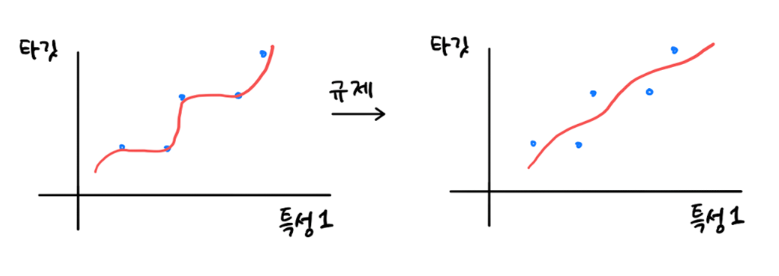

In [33]:
from sklearn.preprocessing import StandardScaler
# StandardScaler 사이킷 런 데이터 전처리 스케일 조정(스케일러)
ss = StandardScaler() # 훈련세트로 학습한 변환기를 사용해 테스트 세트까지 변환 필수
ss.fit(train_poly)

train_scaled = ss.transform(train_poly) # 학습용
test_scaled = ss.transform(test_poly) # 테스트용
# 표준점수로 변환한 학습용, 테스트용 준비 완료
# 평균과 표준 편차로 공식을 적용할 필요가 없다

In [34]:
# 선형회귀 모델의 규제를 추가한 모델은 2개가 있따
# ridge : 계수를 제곱한 값을 기준으로 규제
# lasso : 계수의 절대값을 기준으로 규제를 적용 - > 0 으로 제고 ㅇ가능

In [37]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target) # fit으로 훈련하여 score 로 평가
ridge.score(train_scaled, train_target)

# 테스트 결과 높은 점수 확인
# 모델객체 생성시 alpha 매개변수로 규제의 강도 조절

0.9896101671037343

In [38]:
print(ridge.score(test_scaled, test_target))

0.9790693977615387


In [40]:
# 릿지와 라쏘 모델을 사용할 때 규제의 양을 임으로 조절할 수 있음
# 모델 객체를 만들 때 alpha 매개값을 주면 됨
# alpha 값을 크게 주면 강도가 세짐, 계수 값을 줄이고 더 과소 적합되도록 유도하는 용도

# 적절한 alpha 값을 찾는 방법은 그래프로 확인해야한다

import matplotlib.pyplot as plt

train_score = [] # 훈련 규제알파 농도에 따라  % 결과 기록 저장용
test_score = [] # 테스트 % 결과 저장용
# alpha 값을 바꿀 때 마다 score 메서드 결과 값을 저장할 리스트 생성

In [41]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100]
for a in alpha: # 알파 값 반복용
    # 릿지 모델 생성
    ridge = Ridge(alpha=a)
    # 릿지 모델 훈련
    ridge.fit(train_scaled, train_target)

    # 훈련점수 테스트 점수 저장
    train_score.append(ridge.score(train_scaled, train_target)) # 훈련 점수를 리스트에 보관
    test_score.append(ridge.score(test_scaled, test_target)) # 테스트 점수를 리스트에 보관
print(f"train_score : {train_score}")
print(f"test_score : {test_score}")


train_score : [0.9930455252088248, 0.991780998125052, 0.9903815817570367, 0.9896101671037343, 0.988728468997471, 0.9841843235774494]
test_score : [0.9569388961567329, 0.9800187936871725, 0.9827976465386928, 0.9790693977615387, 0.9725329582461569, 0.9627042641050291]


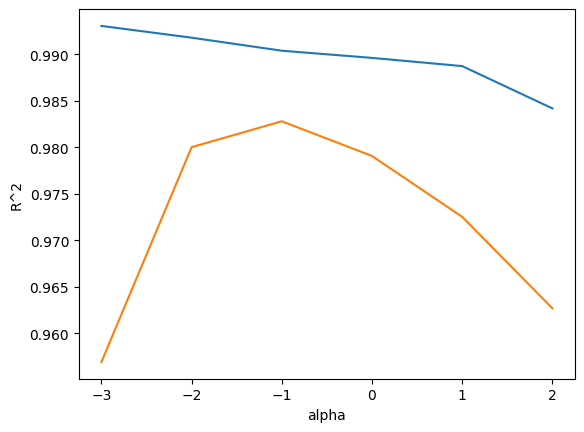

In [42]:
# 결과 차트
# .log10(alpha_list) x축 값이 너무 촘촘하게 보일까봐 지수형식으로 표현
# 0.001 : -3, 0.01 : -2  0.1 : -1
plt.plot(np.log10(alpha), train_score) # 파랑
plt.plot(np.log10(alpha), test_score)  # 주황

plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
# 0.1 일때 제일 좋은 점수로 확인

In [43]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


In [50]:
# 라쏘 규제
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target) # 훈련 후 점수 환산
print(lasso.score(train_scaled, train_target))


0.989789897208096


In [45]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


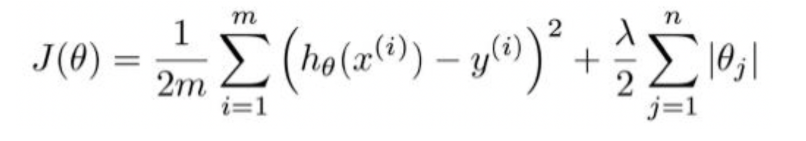


In [52]:
train_score = []
test_score = []

alpha = [0.001, 0.01, 0.1, 1, 10, 100]
for a in alpha: # 알파 값 반복용
    # 라쏘 모델 생성
    lasso = Lasso(alpha=a, max_iter=10000)
    # 라쏘 모델 훈련
    lasso.fit(train_scaled, train_target)

    # 훈련점수 테스트 점수 저장
    train_score.append(lasso.score(train_scaled, train_target)) # 훈련 점수를 리스트에 보관
    test_score.append(lasso.score(test_scaled, test_target)) # 테스트 점수를 리스트에 보관
print(f"train_score : {train_score}")
print(f"test_score : {test_score}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


train_score : [0.9924957354689654, 0.9922988130765112, 0.9902080238600284, 0.9898116789062786, 0.9887624603020236, 0.9078618674946646]
test_score : [0.9731817502723494, 0.9761545611184548, 0.9824382983968606, 0.9801844137326112, 0.9830309645308443, 0.9090772073024512]


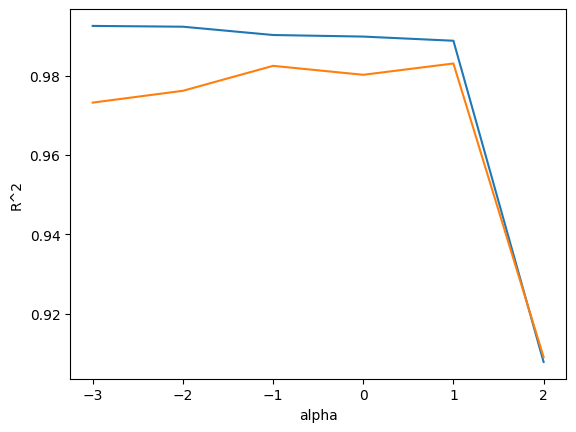

In [53]:
# 결과 차트
plt.plot(np.log10(alpha), train_score) # 파랑
plt.plot(np.log10(alpha), test_score)  # 주황
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
# 왼쪽은 과대 적합 , 오른쪽은 정상(제일 좋은 값은 1 => 10)

In [54]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695
